# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Mạnh Hùng
- MSSV: 20127030
- Lớp: 21CLC05

# Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

In [3]:
train.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,collegeGPA,CollegeCityTier,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,2,87.80,84.00,1,1,73.82,1,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,1,65.00,0,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,1,61.94,0,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,1,80.40,1,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,2,82.00,75.00,2,1,64.30,1,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [4]:
train.describe()

,Gender,10percentage,12percentage,CollegeTier,Degree,collegeGPA,CollegeCityTier,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,...,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2.248000e+03
mean,1.240658,77.518323,74.326695,1.923488,1.079181,71.397407,0.294484,499.296263,499.321619,512.765569,...,21.673932,15.572954,31.815836,2.074288,-0.040017,0.117291,-0.012071,-0.140250,-0.129365,3.068946e+05
std,0.427578,10.048733,11.099852,0.265875,0.270082,8.110462,0.455912,104.048294,88.183772,123.638755,...,95.791394,84.815730,104.067811,33.044269,1.026284,0.962392,0.970497,1.017414,1.030152,2.220735e+05
min,1.000000,43.000000,40.000000,1.000000,1.000000,6.630000,0.000000,180.000000,195.000000,120.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,1.000000,71.000000,66.000000,2.000000,1.000000,66.317500,0.000000,425.000000,435.000000,430.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.726400,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,1.000000,78.800000,74.000000,2.000000,1.000000,71.600000,0.000000,500.000000,505.000000,515.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172735,0.028400,3.000000e+05
75%,1.000000,85.400000,82.415000,2.000000,1.000000,76.185000,1.000000,566.250000,565.000000,595.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,2.000000,97.120000,98.700000,2.000000,2.000000,99.930000,1.000000,875.000000,795.000000,900.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


# Cài đặt hàm

In [5]:
# Cài đặt các hàm cần thiết ở đây
# Cài đặt các hàm cần thiết ở đây
def MAE(predict, trueval):
    return mean_absolute_error(trueval,predict)

def make_new_Dataframe(cols, dataset):
    new_df = dataset[cols].copy()
    return new_df

def Standard_Normalize(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

In [6]:
# hàm CrossValidation (x và y là dữ liệu ở dạng mảng, num_fold là số lượng batch, model là mô hình hồi quy tuyến tính)
def CrossValidation(x, y, num_fold, model):
    size = x.shape[0]
    batch = size/num_fold
    mae = 0
    
    for i in range (num_fold):
        # tính size của batch thứ i
        begin = int(i*batch)
        end = int((i+1)*batch)

        # lấy dữ liệu của batch tương ứng
        x_value = x[begin:end]
        y_value = y[begin:end]
        
        # train và dự đoán mô hình
        model.fit(x_value, y_value)
        y_train_pred = model.predict(x_value)
        
        # tính tổng các MAE
        mae += MAE(y_value, y_train_pred)
    
    avg = mae/num_fold # tính MAE trung bình
    return avg

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [7]:
# Phần code cho yêu cầu 1a
X_1a_train = X_train.iloc[:, :11].copy()
y_1a_train = y_train.copy()

X_1a_test = X_test.iloc[:, :11].copy()
y_1a_test = y_test.copy()

Các dữ liệu sau khi xử lý

In [8]:
print(X_1a_train.head())

   Gender  10percentage  12percentage  CollegeTier  Degree  collegeGPA  \
0       2         87.80         84.00            1       1       73.82   
1       1         57.00         64.50            2       1       65.00   
2       1         77.33         85.17            2       1       61.94   
3       1         84.30         86.00            1       1       80.40   
4       2         82.00         75.00            2       1       64.30   

   CollegeCityTier  English  Logical  Quant    Domain  
0                1      650      665    810  0.694479  
1                0      440      435    210  0.342315  
2                0      485      475    505  0.824666  
3                1      675      620    635  0.990009  
4                1      575      495    365  0.278457  


In [9]:
y_1a_train.head()

0    445000
1    110000
2    255000
3    420000
4    200000
Name: Salary, dtype: int64

In [10]:
print(X_1a_test.head())

   Gender  10percentage  12percentage  CollegeTier  Degree  collegeGPA  \
0       1         61.63         53.17            2       1       60.00   
1       1         72.40         73.40            2       1       68.25   
2       1         79.00         83.40            2       1       73.30   
3       1         73.00         69.00            2       1       65.50   
4       1         92.00         72.00            2       1       66.00   

   CollegeCityTier  English  Logical  Quant    Domain  
0                1      485      415    215  0.450877  
1                0      485      625    655  0.819417  
2                0      425      515    595  0.600057  
3                0      465      480    415  0.622643  
4                1      500      440    500  0.819417  


In [11]:
y_1a_test.head()

0    280000
1    520000
2    150000
3    180000
4    300000
Name: Salary, dtype: int64

Kích thước của các dataframe

In [12]:
print("X train shape = ",X_1a_train.shape)
print("y train shape = ",y_1a_train.shape)
print("X test shape = ",X_1a_test.shape)
print("X test shape = ",y_1a_test.shape)

X train shape =  (2248, 11)
y train shape =  (2248,)
X test shape =  (750, 11)
X test shape =  (750,)


In [13]:
lr = LinearRegression().fit(X_1a_train, y_1a_train)
print(lr.coef_)
y_pred = lr.predict(X_1a_test)

[-23183.32950765    702.76679172   1259.0187879  -99570.60814074
  18369.9624496    1297.53200035  -8836.727123      141.75993906
    145.74234652    114.64331342  34955.75040521]


In [14]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
result = MAE(y_pred, y_1a_test)
print("MAE = ",result)

MAE =  105052.52978823145


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -23183.33 \times \text{Gender} + 702.767 \times \text{10percentage} + 1259.019 \times \text{12percentage} - 99570.608 \times \text{CollegeTier} + 18369.962 \times \text{Degree} + 1297.532 \times \text{collegeGPA} - 8836.727 \times \text{CollegeCityTier} + 141.759 \times \text{English} + 145.742 \times \text{Logical} + 114.643 \times \text{Quant} + 34955.750 \times \text{Domain}$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [15]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Rút trích dữ liệu từ tập train
cols = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience','Salary']
opperheimer = make_new_Dataframe(cols,train)
print(opperheimer.head())

   conscientiousness  agreeableness  extraversion  nueroticism  \
0            -0.1590         0.3789        1.2396      0.14590   
1             1.1336         0.0459        1.2396      0.52620   
2             0.5100        -0.1232        1.5428     -0.29020   
3            -0.4463         0.2124        0.3174      0.27270   
4            -1.4992        -0.7473       -1.0697      0.06223   

   openess_to_experience  Salary  
0                 0.2889  445000  
1                -0.2859  110000  
2                -0.2875  255000  
3                 0.4805  420000  
4                 0.1864  200000  


Shuffle data


In [16]:
def shuffle(df):
    return df.sample(frac = 1)


In [17]:
# xáo trộn dữ liệu tổng quát
opperheimer = shuffle(opperheimer)

Tách cột salary

In [18]:
X_1b_train = opperheimer.iloc[:, :-1]
y_1b_train = opperheimer.iloc[:, -1]

In [19]:
print(X_1b_train.head())

      conscientiousness  agreeableness  extraversion  nueroticism  \
1728             0.9737         1.4368        0.0914     -0.43717   
929             -0.0154        -0.2871        0.0100      0.27270   
1290            -1.7389        -0.2871       -0.7585      1.54040   
1376             1.1336         0.0459       -0.1437     -1.62890   
1165             0.0464        -1.9953        0.0914      0.88480   

      openess_to_experience  
1728                -0.4455  
929                  0.2889  
1290                -1.6273  
1376                -0.6692  
1165                 0.0284  


In [20]:
y_1b_train.head()

1728    415000
929     180000
1290    180000
1376    335000
1165    150000
Name: Salary, dtype: int64

kích thước của tập X và y

In [21]:
print("X train shape = ",X_1b_train.shape)
print("y train shape = ",y_1b_train.shape)

X train shape =  (2248, 5)
y train shape =  (2248,)


Tạo mảng để lưu MAE trung bình của các thuộc tính

In [22]:
features = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
mae = []

In [23]:
# hàm tính cross-validation cho toàn bộ thuộc tính
def calculating(feature_list, X, y, model):
    for i in range(len(feature_list)):
        x_temp = np.array(make_new_Dataframe(feature_list[i],X)).reshape((-1, 1)).copy()
        y_temp = np.array(y).copy()
        mae.append(CrossValidation(x_temp, y_temp, num_fold=5, model= model))

In [24]:
model = LinearRegression()
calculating(features, X_1b_train, y_1b_train, model)

In [25]:
print("AVG MAE result")
print(features)
print(mae)
print("Best features is ", features[np.argmin(mae)])

AVG MAE result
['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
[124410.95544591092, 123643.81495254862, 123892.80636298409, 123484.99926234774, 124217.92121632039]
Best features is  nueroticism


In [26]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_best_feature = np.array(make_new_Dataframe('nueroticism', X_1b_train)).reshape((-1, 1))
y_train_temp = np.array(y_1b_train)
best_personality_feature_model = LinearRegression()
best_personality_feature_model.fit(X_best_feature, y_train_temp)

LinearRegression()

In [27]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
X_1b_test = np.array(make_new_Dataframe('nueroticism', X_test)).reshape((-1, 1))
y_1b_test = np.array(y_test.copy())

y_pred = best_personality_feature_model.predict(X_1b_test)
mae = MAE(y_pred, y_1b_test)
print("MAE = ", mae)
print(best_personality_feature_model.coef_)

MAE =  119361.91739987815
[-16021.49366179]


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -16021.494 \times \text{nueroticism}$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [28]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

cols = ['English', 'Logical', 'Quant', 'Salary']
retrieved = make_new_Dataframe(cols,train)
print(retrieved.head())

   English  Logical  Quant  Salary
0      650      665    810  445000
1      440      435    210  110000
2      485      475    505  255000
3      675      620    635  420000
4      575      495    365  200000


In [29]:
# xáo dữ liệu
retrieved = shuffle(retrieved)
print(retrieved.head())

      English  Logical  Quant  Salary
578       555      465    605  335000
728       385      510    585  310000
103       525      525    565  450000
1794      395      635    495  180000
672       455      485    605  335000


Tách cột Salary

In [30]:
X_1c_train = retrieved.iloc[:, :-1]
y_1c_train = retrieved.iloc[:, -1]

Kích thước của tập data ở câu C

In [31]:
print("X train shape = ",X_1c_train.shape)
print("y train shape = ",y_1c_train.shape)

X train shape =  (2248, 3)
y train shape =  (2248,)


In [32]:
features = ['English', 'Logical', 'Quant']
mae = []

In [33]:
model = LinearRegression()
calculating(features, X_1c_train, y_1c_train, model)

In [34]:
print("AVG MAE result")
print(features)
print(mae)
print("Best features is ", features[np.argmin(mae)])

AVG MAE result
['English', 'Logical', 'Quant']
[120857.35608453533, 120394.6512782099, 117196.46318992332]
Best features is  Quant


In [35]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_best_feature = np.array(make_new_Dataframe('Quant', X_1c_train)).reshape((-1, 1)).copy()
y_train_temp = np.array(y_1c_train).copy()
best_skill_feature_model = LinearRegression()
best_skill_feature_model.fit(X_best_feature, y_train_temp)

LinearRegression()

In [36]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
X_1c_test = np.array(make_new_Dataframe('Quant', X_test)).reshape((-1, 1))
y_1c_test = np.array(y_test.copy())

y_pred = best_personality_feature_model.predict(X_1c_test)
mae = MAE(y_pred, y_1c_test)
print("MAE = ", mae)
print(best_personality_feature_model.coef_)

MAE =  8298522.218664625
[-16021.49366179]


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -16021.494 \times \text{Quant}$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [37]:
# Trình bày các phần tìm ra mô hình
labels = train.columns
labels


Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

<Axes: >

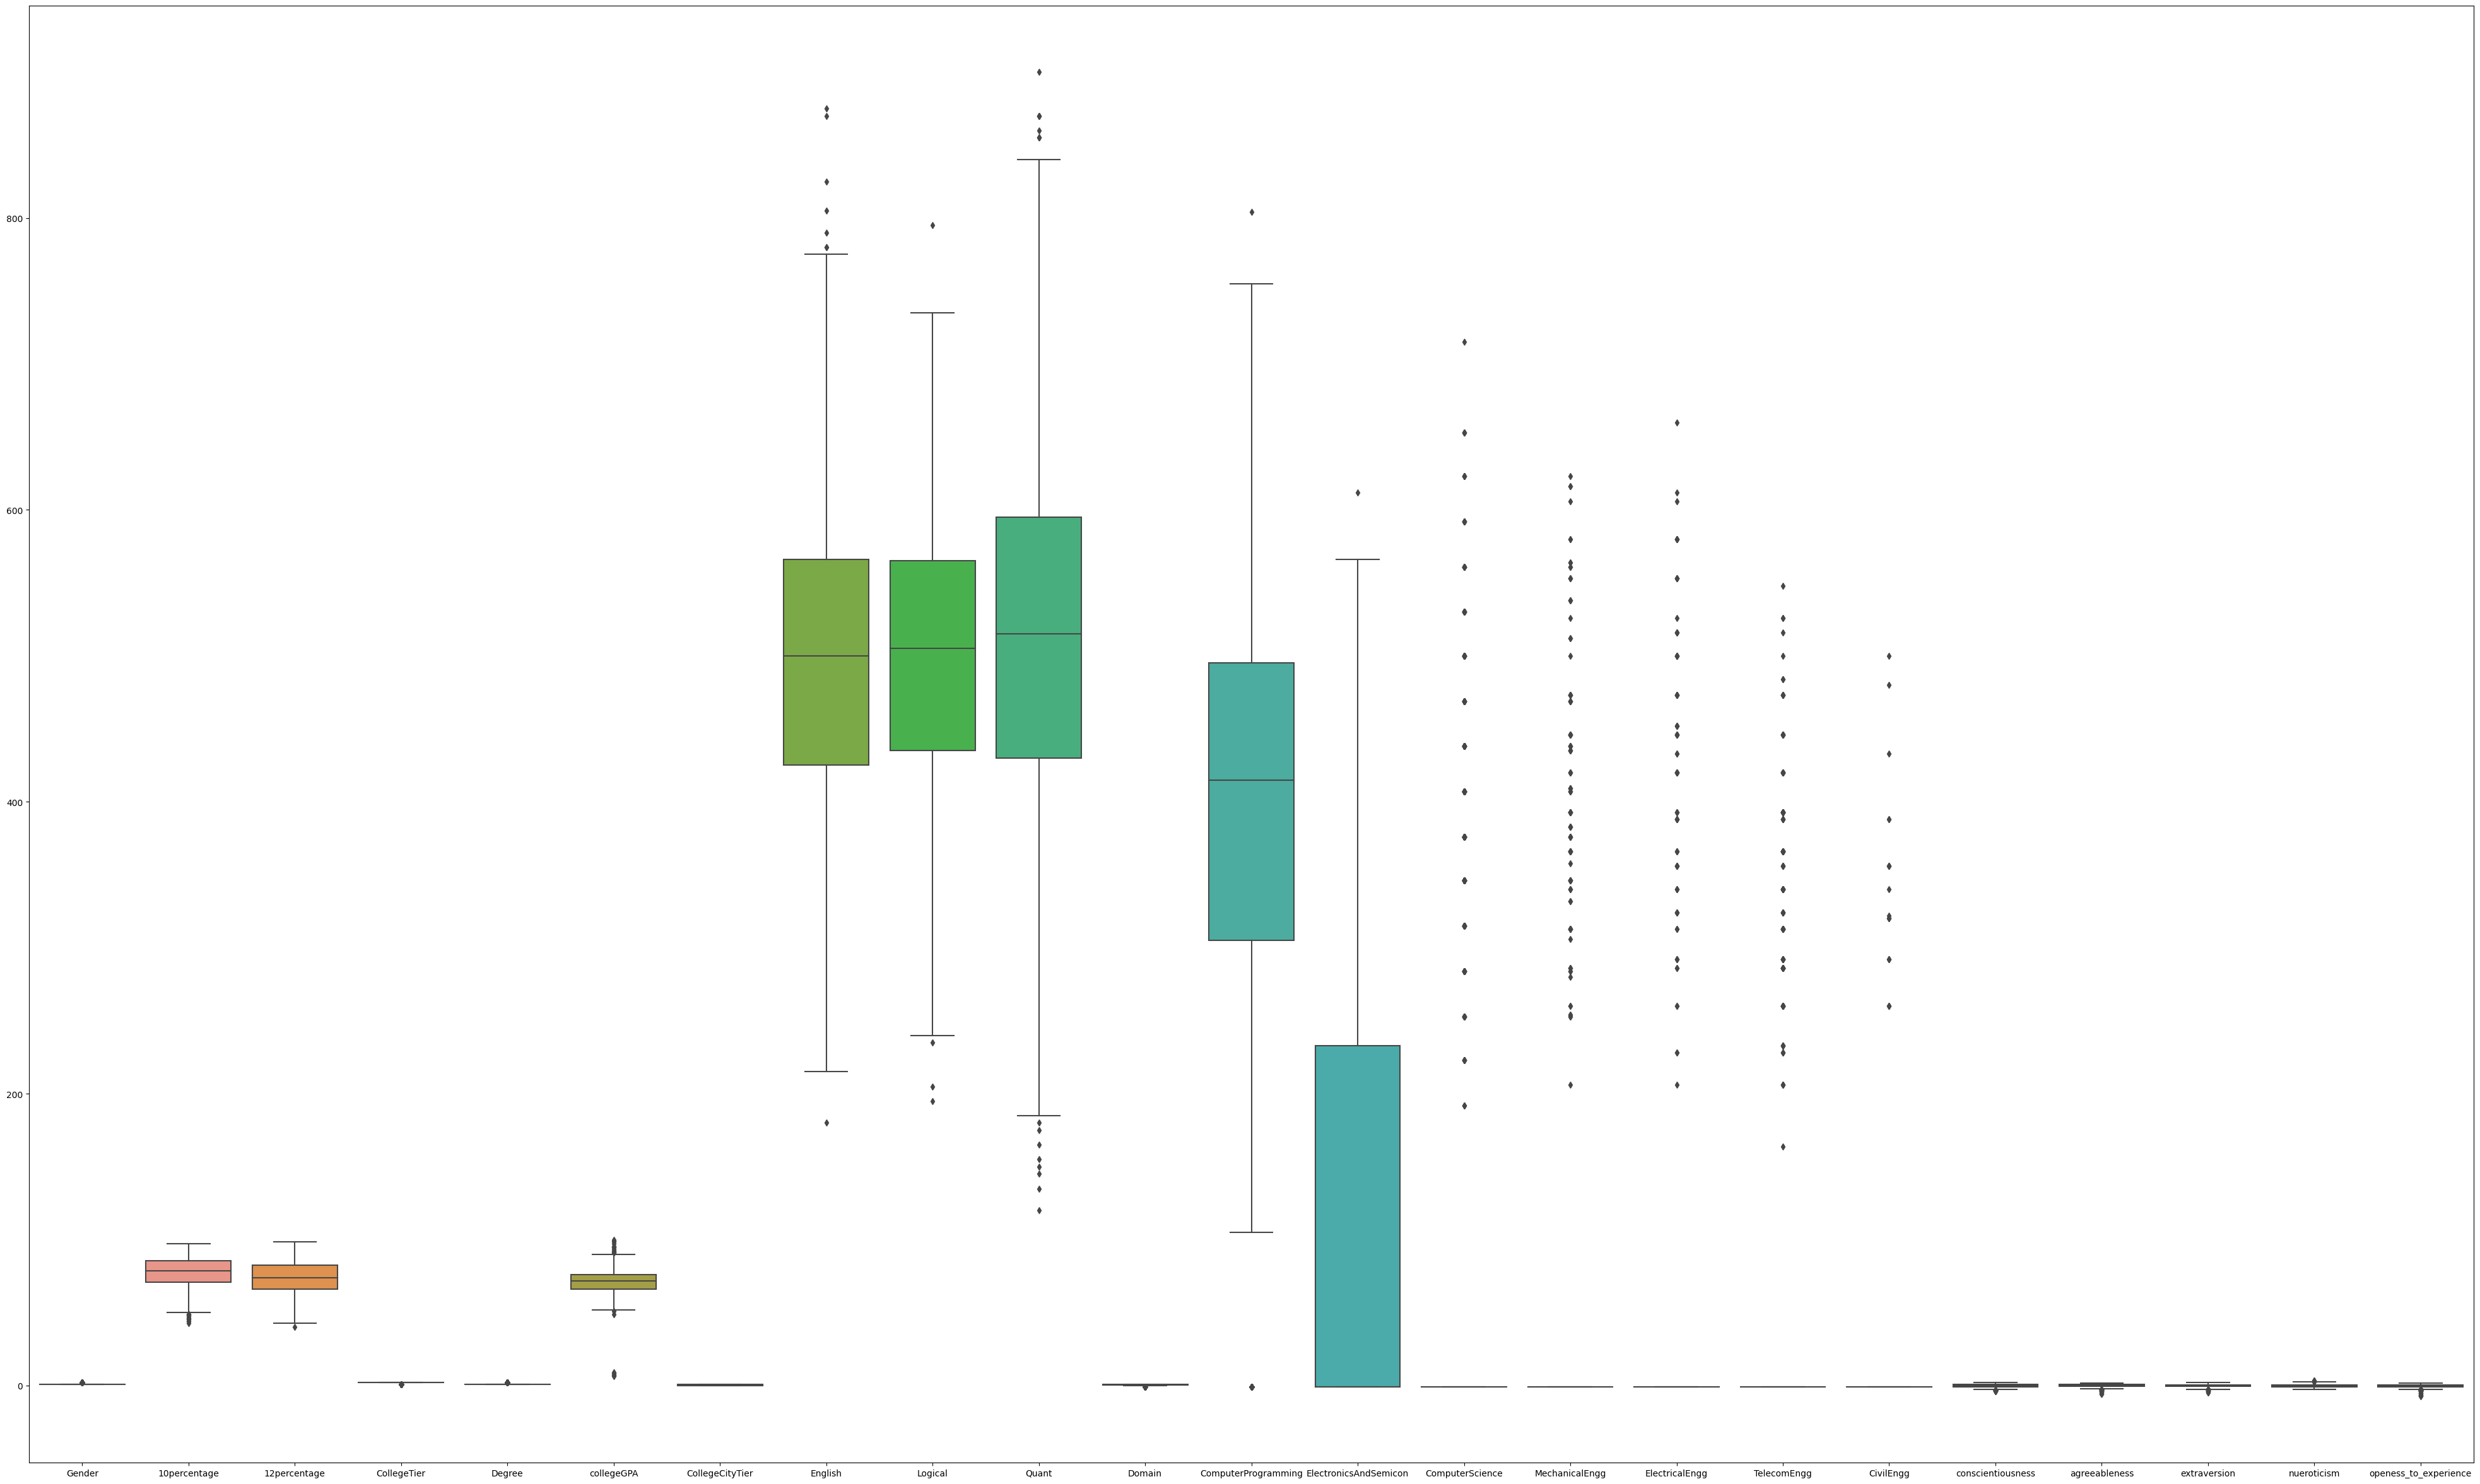

In [38]:
# Boxplot toàn bộ thuộc tính
plt.figure(figsize=(50,30))
sns.boxplot(data=train.iloc[:,:-1])

<Axes: >

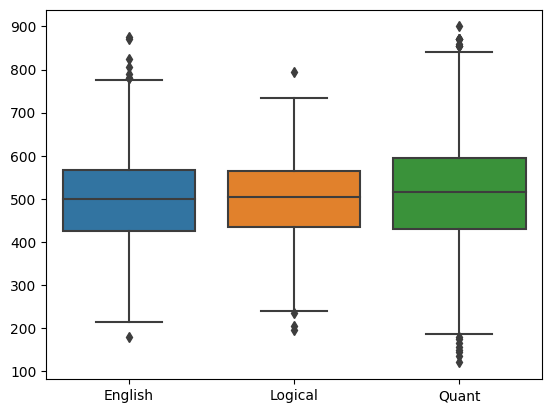

In [39]:
# box plot các kỹ năng
sns.boxplot(data=train[["English", "Logical","Quant"]])

<Axes: >

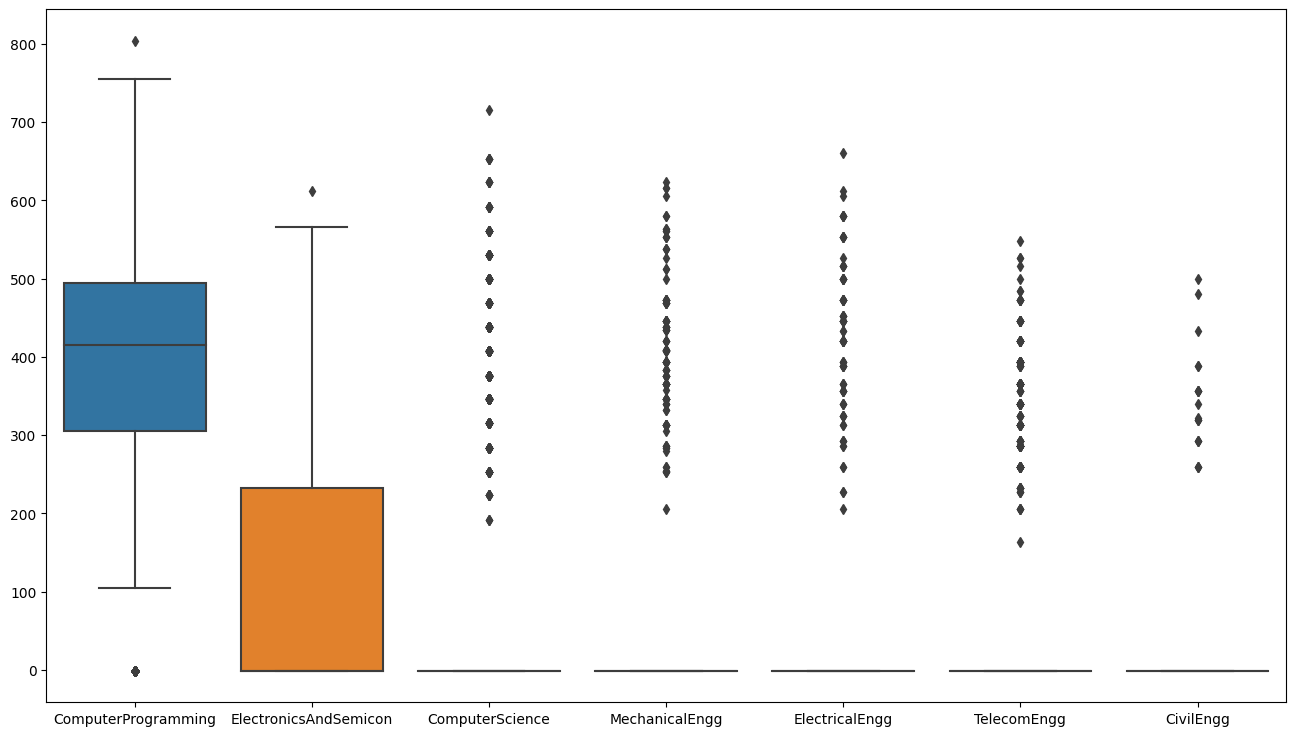

In [40]:
# Boxplot các chuyên ngành
plt.figure(figsize=(16,9))
sns.boxplot(data=train[['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']])

Do ta có thể thấy, có quá nhiều outliers ở các chuyên ngành và số lượng thu thập dữ liệu ở các chuyên ngành là khác nhau nên, ta sẽ không xét chuyên ngành đến dữ liệu

<Axes: >

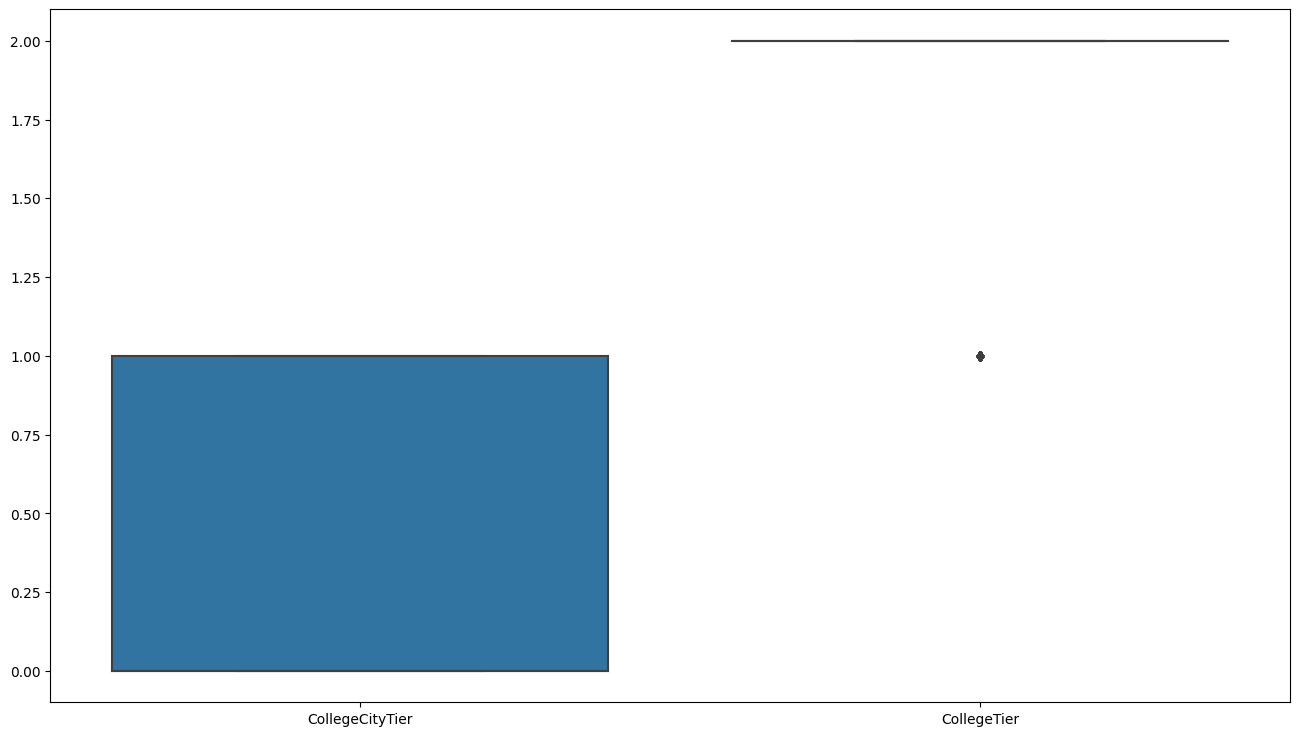

In [41]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train[['CollegeCityTier','CollegeTier']])

Hơn nữa các dữ kiệu về CollegeCityTier và CollegeTier cũng quá rời rạc nên cũng bị loại bỏ nốt

In [42]:
train.drop(['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 
            'CollegeCityTier','CollegeTier'],  axis = 1, inplace = True)

<Axes: >

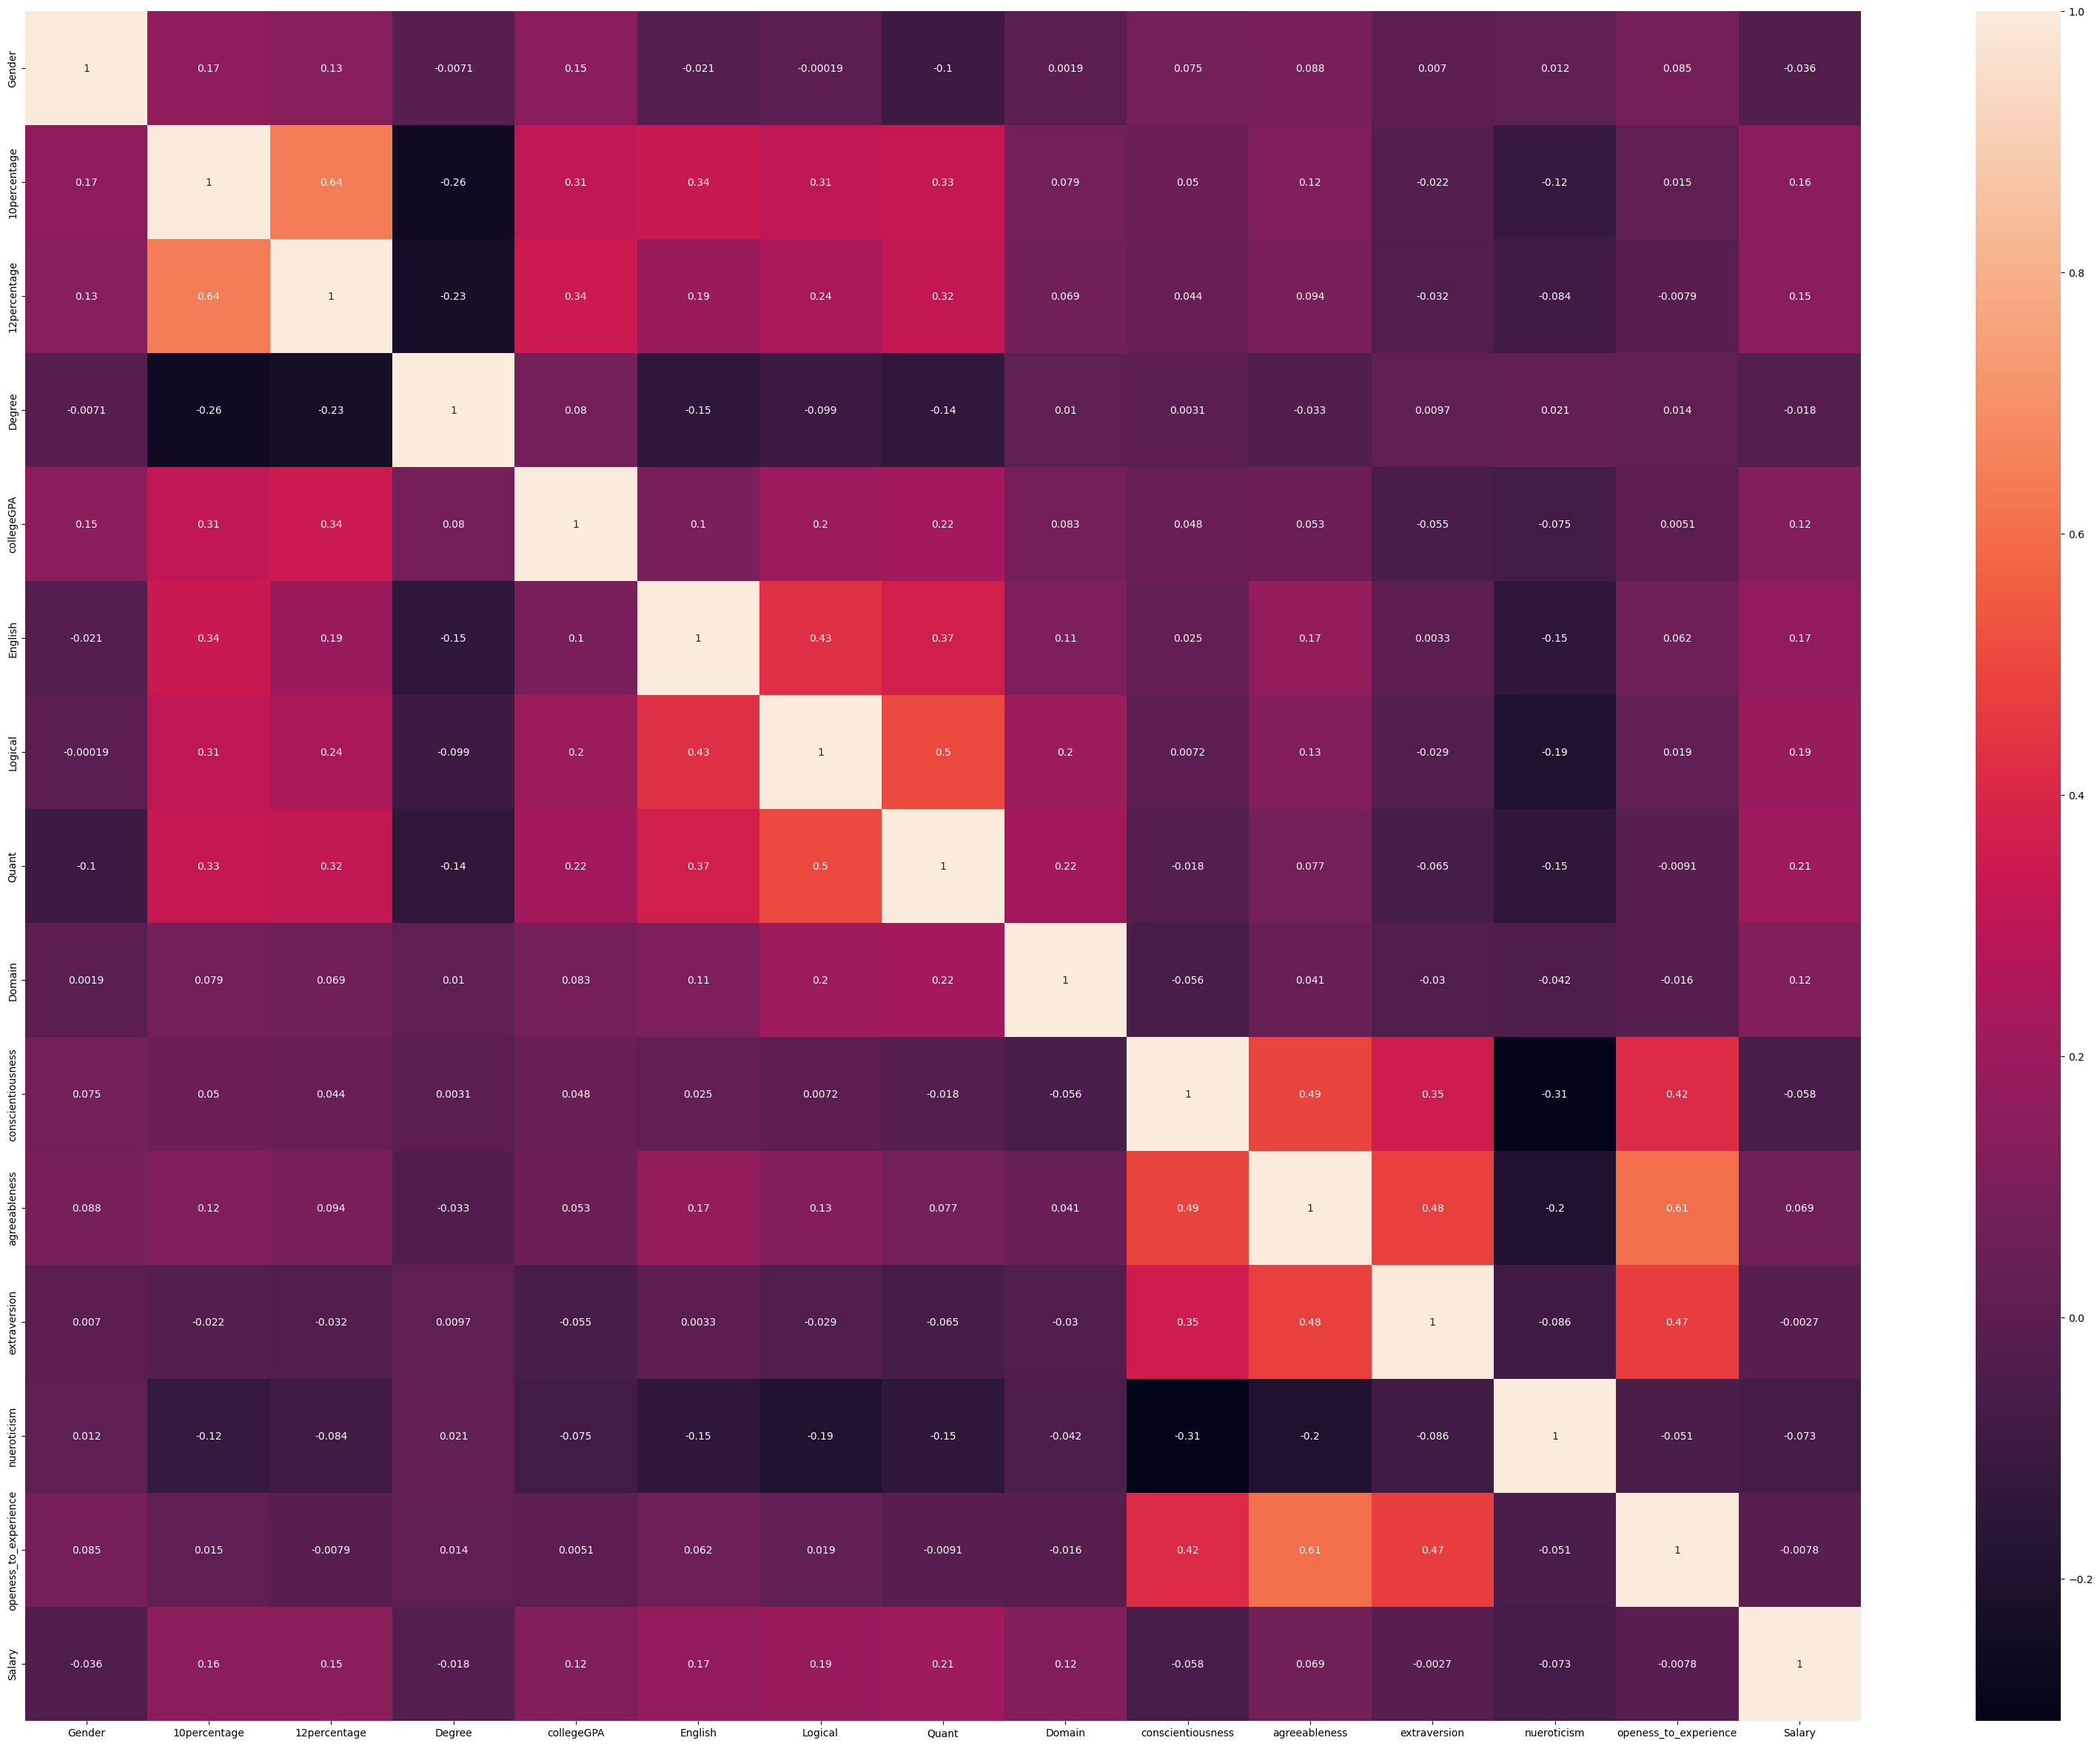

In [43]:
# Hệ số tương quan của các thuộc tính
plt.figure(figsize=(40,30))
sns.heatmap(train.corr(), annot=True)

Ta có thể thấy rằng, độ tương quan giữa các thuộc tính với mức lương là khác nhau</br>
Tuy nhiên, ta có thể thấy rằng độ lớn của độ tương quan giữa các yếu tố và mức lương càng lớn thì chỉ mức độ ảnh hưởng đến mức lương càng cao.</br>
Vì thế, ta sẽ lần lượt chọn các thuộc tính sau:

In [44]:
feature1 = ["Quant", "Logical", "English", "collegeGPA", "Domain", "Salary"]
feature2 = ["10percentage", "12percentage", "Salary"]

## Thử nghiệm, so sánh các mô hình

In [45]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

data_feat_1 = make_new_Dataframe(feature1, train)
data_feat_2 = make_new_Dataframe(feature2, train)

In [46]:
#xáo dữ liệu
data_feat_1 = shuffle(data_feat_1)
data_feat_2 = shuffle(data_feat_2)

In [47]:
print(data_feat_1.head())

      Quant  Logical  English  collegeGPA    Domain  Salary
1956    545      525      485       64.06  0.338786  225000
1876    415      425      440       70.00  0.622643  300000
1585    555      475      605       62.93  0.694479  300000
2198    365      415      525       59.00  0.216785   90000
1320    405      505      640       75.00  0.911395  200000


In [48]:
print(data_feat_2.head())

      10percentage  12percentage  Salary
2127         65.00          68.0  240000
1195         76.80          83.0  300000
1651         77.40          81.6  570000
554          62.88          77.5  560000
1570         79.60          50.4  180000


In [49]:
# chuẩn hóa dữ liệu
data_feat_1 = Standard_Normalize(data_feat_1)
data_feat_2 = Standard_Normalize(data_feat_2)

In [50]:
# rút trích các tập dữ liệu
X_1d_1 = data_feat_1[:, :-1]
y_1d_1 = data_feat_1[:, -1]

X_1d_2 = data_feat_2[:, :-1]
y_1d_2 = data_feat_2[:, -1]

In [51]:
# check các kích thước
print("X1 train shape = ",X_1d_1.shape)
print("y1 train shape = ",y_1d_1.shape)
print("X2 train shape = ",X_1d_2.shape)
print("y2 train shape = ",y_1d_2.shape)

X1 train shape =  (2248, 5)
y1 train shape =  (2248,)
X2 train shape =  (2248, 2)
y2 train shape =  (2248,)


In [52]:
# mô hình 1.
model1 = LinearRegression()
avg_mae1 = CrossValidation(X_1d_1, y_1d_1, 5, model1)
print("first model avg. mae = ",avg_mae1)

first model avg. mae =  0.5142200299442587


In [53]:
# mô hình 2
model2 = LinearRegression()
avg_mae2 = CrossValidation(X_1d_2, y_1d_2, 5, model2)
print("second model avg. mae = ",avg_mae2)

second model avg. mae =  0.5322902194266467


Như vậy ta thấy mô hình một với các tập thược tính feature1 là tốt hơn

In [54]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
my_best_model = LinearRegression()
my_best_model.fit(X_1d_1, y_1d_1)

LinearRegression()

In [55]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
test_feat_1 = make_new_Dataframe(feature1, test)
test_feat_1 = Standard_Normalize(test_feat_1)
X_1d_test = test_feat_1[:,:-1]
y_1d_test = test_feat_1[:,-1]
y_pred = my_best_model.predict(X_1d_test)
print("My best model MAE = ", MAE(y_pred, y_1d_test))
print(my_best_model.coef_)

My best model MAE =  0.5847596331772112
[0.10814796 0.0693188  0.08517612 0.07046552 0.06871255]


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 0.108 \times \text{Quant} + 0.069 \times \text{Logical} + 0.085 \times \text{English} + 0.070 \times \text{collegeGPA} + 0.069 \times \text{Domain}$$